In [12]:
# Loading packages

import requests
from bs4 import BeautifulSoup
import os
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [13]:
# Load df from disk
df2=pd.read_csv("df2.csv")
df_ia = pd.read_csv("df_ia.csv")
df_sotu = pd.read_csv("df_sotu.csv")
df_rep = pd.read_csv("df_rep.csv")
df_demo = pd.read_csv("df_demo.csv")

[Text(0, 0, '-20,000'),
 Text(0, 0, '0'),
 Text(0, 0, '20,000'),
 Text(0, 0, '40,000'),
 Text(0, 0, '60,000'),
 Text(0, 0, '80,000'),
 Text(0, 0, '100,000'),
 Text(0, 0, '120,000'),
 Text(0, 0, '140,000'),
 Text(0, 0, '160,000'),
 Text(0, 0, '180,000')]

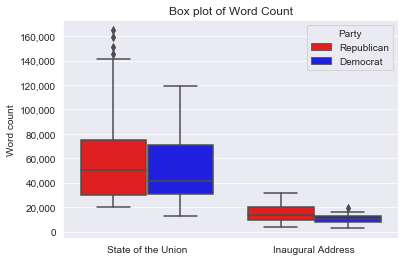

In [14]:
#Boxplot
sns.set_style("darkgrid")
ax = sns.boxplot(x='Type', y="word_count", orient='v', hue='Party', data=df2, palette = ['red', 'blue'])
plt.title("Box plot of Word Count")
plt.xlabel("")
plt.ylabel("Word count")

ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])

In [15]:
# state of the union dataset
df_speech_des = df2.groupby('Type').describe().head()

df_speech_des.head()

#df_speech_des['word_count']
#with open('mytable.tex','w') as tf:
 #   tf.write(df_speech_des[XXX].to_latex())

Unnamed: 0                                                \
                        count       mean        std  min   25%   50%    75%   
Type                                                                          
Inaugural Address        39.0  83.692308  48.086082  2.0  52.0  73.0  122.5   
State of the Union      133.0  86.030075  50.451888  0.0  40.0  89.0  129.0   

                          Republican            ... climate_count       \
                      max      count      mean  ...           75%  max   
Type                                            ...                      
Inaugural Address   171.0       39.0  0.589744  ...           0.0  2.0   
State of the Union  170.0      133.0  0.646617  ...           0.0  4.0   

                   moon_count                                               
                        count      mean       std  min  25%  50%  75%  max  
Type                                                                        
Inaugural Address        39.0  0.102564  0.502356  0.0  0.0  0.0  0.0  3.0  
State of the Union      133.0  0.082707  0.326717  0.0  0.0  0.0  0.0  2.0  

[2 rows x 248 columns]

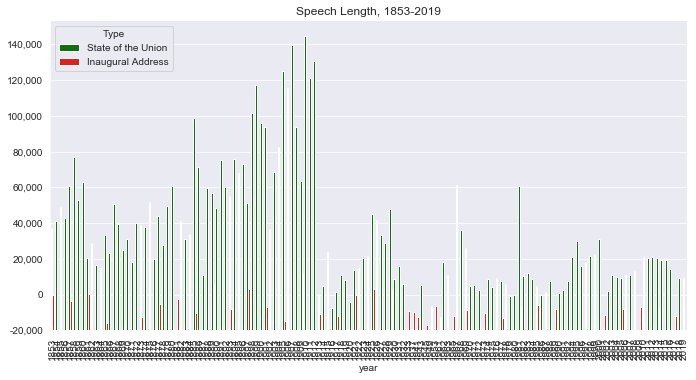

In [16]:
sns.set_style("darkgrid")

timeline = sns.catplot(x="year",y="word_count",hue="Type",data=df2,kind="bar",height=5,aspect=2,legend_out=False, palette=['green','red'])
timeline.set_xticklabels(rotation=90)
plt.title("Speech Length, 1853-2019")
plt.ylabel("")
timeline.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])

#plt.figure(figsize=(20,70))

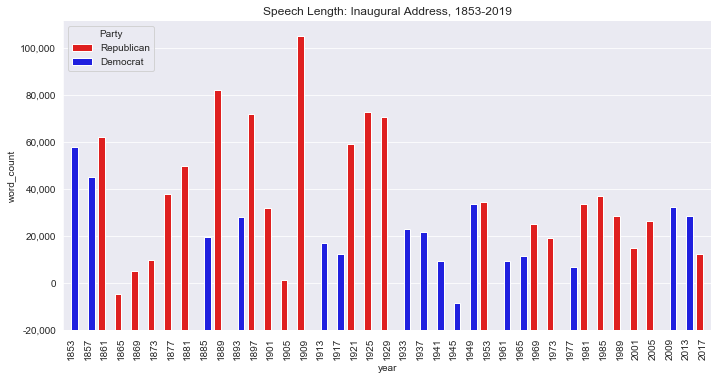

In [17]:
sns.set_style("darkgrid")

timeline = sns.catplot(x="year",y="word_count",hue="Party",data=df_ia,kind="bar",height=5,aspect=2,legend_out=False, palette=['red','blue'])
timeline.set_xticklabels(rotation=90)
plt.title("Speech Length: Inaugural Address, 1853-2019")
#plt.ylabel("")
timeline.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])

#plt.figure(figsize=(20,70))

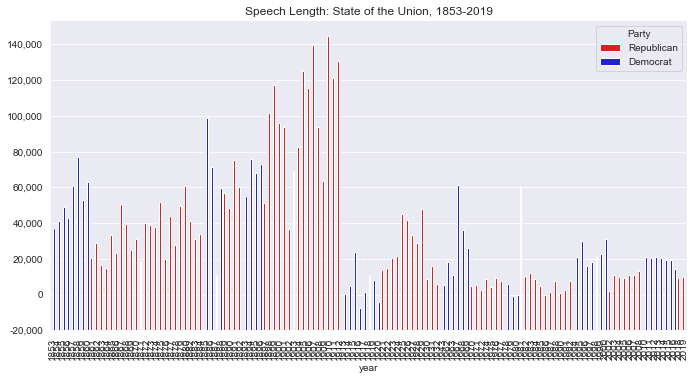

In [18]:
sns.set_style("darkgrid")

timeline = sns.catplot(x="year",y="word_count",hue="Party",data=df_sotu,kind="bar",height=5,aspect=2,legend_out=False, palette=['red','blue'])
timeline.set_xticklabels(rotation=90)
plt.title("Speech Length: State of the Union, 1853-2019")
plt.ylabel("")
timeline.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])

#plt.figure(figsize=(20,70))

# Positive and Negative 

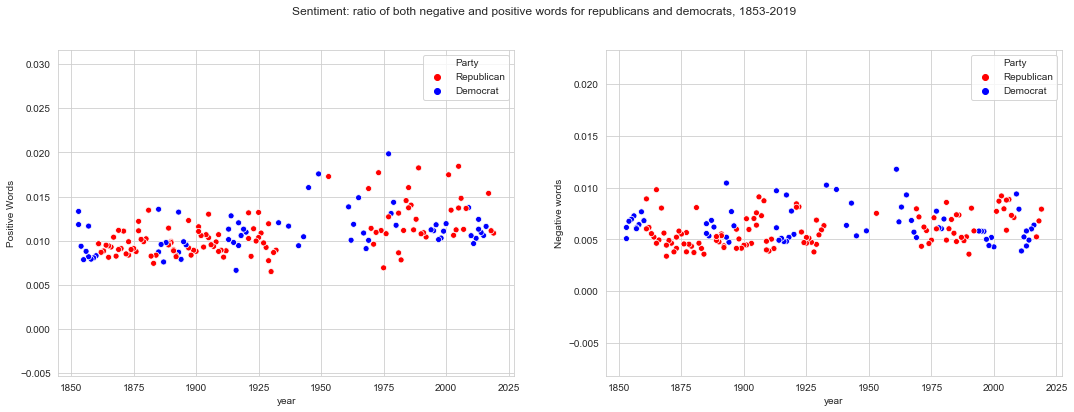

In [19]:
# SOMETHNG IS WRONG WITH THIS GRAPH !! 
# plotting positive and negative words against each other 
import seaborn as sns; sns.set_style("whitegrid")
import matplotlib as mpl

mpl.rcParams['lines.color'] = 'red'

from matplotlib.ticker import FuncFormatter

fig, ax = plt.subplots(1,2, figsize = (18,6))

sentiment = sns.scatterplot(x="year",y="positive_words_ratio", hue='Party', data=df2, palette = ['red', 'blue'], ax=ax[0])
sentiment2 = sns.scatterplot(x="year",y="negative_words_ratio", hue='Party', data=df2, palette = ['red', 'blue'], ax=ax[1])
plt.suptitle("Sentiment: ratio of both negative and positive words for republicans and democrats, 1853-2019")
ax[0].set_ylabel('Positive Words')
ax[1].set_ylabel('Negative words')
timeline.set_xticklabels(rotation=90)


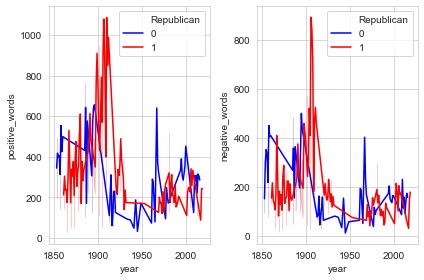

In [20]:
fig, axes = plt.subplots(nrows=1, ncols=2)

sentiment= sns.lineplot(x="year",y="positive_words", hue='Republican', data=df2, palette = ['blue', 'red'], ax=axes[0])
sentiment= sns.lineplot(x="year",y="negative_words", hue='Republican', data=df2, palette = ['blue', 'red'], ax=axes[1])
#plt.title("Sentiment: ratio of both negative and positive words for republicans and democrats, 1853-2019")
#plt.ylabel("")

#timeline.set_xticklabels(rotation=90)
#plt.title("Year wise Speech Length")
#plt.ylabel("")
#axes[0].plot(x1, y1)
#axes[1].plot(x2, y2)
fig.tight_layout()

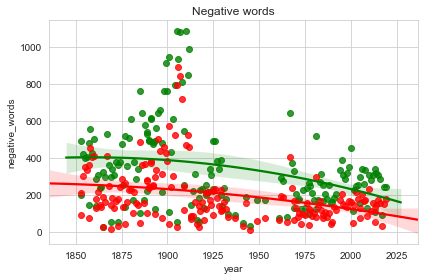

In [21]:
sns.regplot(x=df2['year'],y=df2['positive_words'], order=2, color='green').set_title('Positive words')
sns.regplot(x=df2['year'],y=df2['negative_words'], order=2, color='red').set_title('Negative words')
plt.tight_layout()
axes[1].set_ylim([0,1])
fig.savefig('plotE.png')

Text(0, 0.5, '')

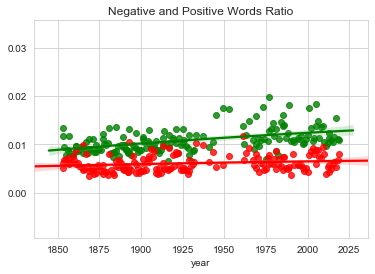

In [22]:
import matplotlib.pyplot as plt

sentiment_m=sns.regplot(x=df2['year'],y=df2['positive_words_ratio'], order=2, color='green').set_title('Positive words')
sentiment_m=sns.regplot(x=df2['year'],y=df2['negative_words_ratio'], order=2, color='red').set_title('Negative and Positive Words Ratio')
#fig.savefig('plotE.png')
plt.title("Negative and Positive Words Ratio")
plt.ylabel("")


Text(16.200000000000003, 0.5, ' ')

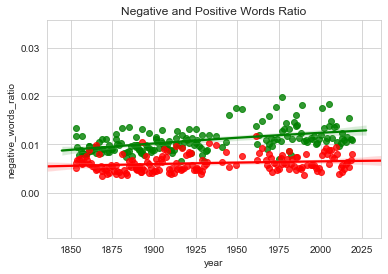

In [23]:
sentiment_q=sns.regplot(x=df2['year'],y=df2['positive_words_ratio'], order=2, color='green').set_title('Positive words')
sentiment_q=sns.regplot(x=df2['year'],y=df2['negative_words_ratio'], order=2, color='red').set_title('Negative and Positive Words Ratio')
plt.ylabel=("")
ax[0].set_ylabel(' ')

# Plotting words 

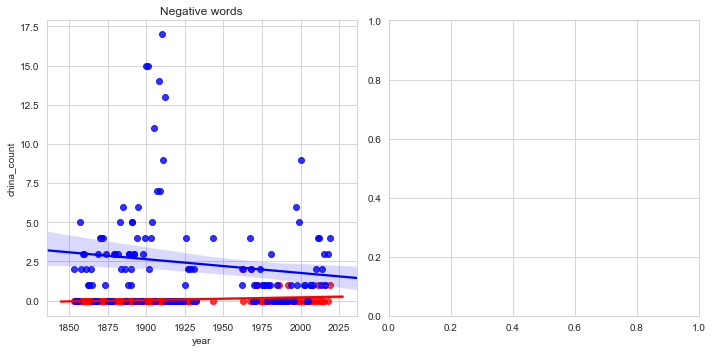

In [24]:

fig, axes =plt.subplots(1,2, figsize=(10,5))

#sns.regplot(x=iris['sepal_length'],y=iris['petal_length'], order=2, ax=axes[0]).set_title('Iris')
sns.regplot(x=df_sotu['year'],y=df_sotu['moon_count'], order=1, ax=axes[0], color='red').set_title('Positive words')
sns.regplot(x=df_sotu['year'],y=df_sotu['china_count'], order=1, ax=axes[0], color='blue').set_title('Negative words')

plt.tight_layout()
axes[1].set_ylim([0,1])
fig.savefig('plotE.png')